# Pandas Test - Real life Exercise

In [24]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
27820,2021-week_34,AD07LG9RJT,iDreamsky Technology,US,yes,NaN,Qality,DNNQ
217485,2021-week_48,AD079ZH6MQ,RelayFoods,DE,yes,NaN,Qality,DNNQ
153857,2021-week_43,AD00V8OQXW,RelayFoods,JP,yes,NaN,Qality,DNNQ
212605,2021-week_47,AD09788S9T,Extreme DA,US,yes,NaN,Yield,XGBY
123079,2021-week_41,AD07SFT9MY,Search Million Culture,IN,yes,NaN,Qality,UserPopQ


In [4]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [5]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [6]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [7]:
#1
df = ad_recs_annotated
df['year'] = df['week_id'].astype(str).str[:4]

In [8]:
#3
df['Success'] = df['is_success'].map({'yes': 1, 'no': 0})

In [9]:
#4
df['is_sever_new'] = df['is_sever'].fillna(False)
#5
df['is_success'] = df['is_success'].str.capitalize()

In [10]:
print (df)

             week_id       ad_id               requester region is_success  \
0       2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1       2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2       2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3       2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4       2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   
...              ...         ...                     ...    ...        ...   
373783  2022-week_52  AD08KQ8GDG              Extreme DA     US        Yes   
373784  2022-week_52  AD07C8XSMN                   Fancy     US        Yes   
373785  2022-week_52  AD096LRR88              Extreme DA     US        Yes   
373786  2022-week_52  AD08FWNFDO              RelayFoods     US        Yes   
373787  2022-week_52  AD00NATC8M           Tab Solutions     US        Yes   

       is_sever recommendation_type rec_provider  year  Success

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [11]:
#1
count_us = (df['region'] == 'US').sum()
print(count_us)

103846


In [12]:
#2
success_us = (df['region'] == 'US').sum() & (df['is_success'] == 'Yes').sum()
print (success_us)

33798


In [13]:
#3
success_us_week52 = (df['region'] == 'US').sum() & (df['is_success'] == 'Yes').sum() & (df['week_id'] == '2022-week_52').sum() 
print (success_us_week52)

1026


In [14]:
#4
counts = df['rec_provider'].value_counts()
count = counts['DNNQ'] + counts['RNNY'] + counts['UserPopQ']
print(count)

200093


In [15]:
#5
count_rulebase = counts ['RuleBasedY']
print(count_rulebase)

28154


In [16]:
#6
count_year = df['year'].value_counts()
count_2021 = count_year ['2021']
print(count_2021)

271615


In [17]:
#8
only_successful_ad = df[df['is_success'] == 'Yes']
most_popular_ad = only_successful_ad['ad_id'].value_counts().idxmax()
print (most_popular_ad)

AD07PFFMP9


In [18]:
#9
only_nonsuccessful_ad = df[df['is_success'] == 'No']
least_popular_ad = only_nonsuccessful_ad['ad_id'].value_counts().idxmax()
print (least_popular_ad)

AD0886VY87


In [19]:
#10
filtered_None = df[df['is_sever'].isna()].sum
print(filtered_None)

<bound method NDFrame._add_numeric_operations.<locals>.sum of              week_id       ad_id               requester region is_success  \
0       2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1       2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2       2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3       2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4       2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   
...              ...         ...                     ...    ...        ...   
373783  2022-week_52  AD08KQ8GDG              Extreme DA     US        Yes   
373784  2022-week_52  AD07C8XSMN                   Fancy     US        Yes   
373785  2022-week_52  AD096LRR88              Extreme DA     US        Yes   
373786  2022-week_52  AD08FWNFDO              RelayFoods     US        Yes   
373787  2022-week_52  AD00NATC8M           Tab Solutions     US        Yes   

 

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [20]:
#1
num_weeks = df['week_id'].nunique()
print(num_weeks)

26


In [21]:
#2
num_region = df['region'].nunique()
print(num_region)

5


In [28]:
#4
filtered_None = df[df['is_sever'].isna()].sum
print(filtered_None)

<bound method NDFrame._add_numeric_operations.<locals>.sum of              week_id       ad_id               requester region is_success  \
0       2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1       2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2       2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3       2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4       2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   
...              ...         ...                     ...    ...        ...   
373783  2022-week_52  AD08KQ8GDG              Extreme DA     US        Yes   
373784  2022-week_52  AD07C8XSMN                   Fancy     US        Yes   
373785  2022-week_52  AD096LRR88              Extreme DA     US        Yes   
373786  2022-week_52  AD08FWNFDO              RelayFoods     US        Yes   
373787  2022-week_52  AD00NATC8M           Tab Solutions     US        Yes   

 

In [34]:
#5
ad_counts = ad_recs_annotated.groupby(['week_id', 'ad_id'])['ad_id'].count()

if (ad_counts > 1).any():
    print("more than once")

most_sent_ad = ad_counts.groupby('week_id').idxmax().reset_index()
print("ad_id sent the most in a given week: \n", most_sent_ad)

more than once
ad_id sent the most in a given week: 
          week_id                       ad_id
0   2021-week_33  (2021-week_33, AD07FM8DDG)
1   2021-week_34   (2021-week_34, AD079Q9D7)
2   2021-week_35  (2021-week_35, AD07TTH8TM)
3   2021-week_36  (2021-week_36, AD088J88G6)
4   2021-week_37  (2021-week_37, AD008MZV8O)
5   2021-week_38  (2021-week_38, AD088J88G6)
6   2021-week_39  (2021-week_39, AD008HD0WE)
7   2021-week_40  (2021-week_40, AD098SWYF6)
8   2021-week_41  (2021-week_41, AD098SWYF6)
9   2021-week_42  (2021-week_42, AD008IR8RJ)
10  2021-week_43  (2021-week_43, AD087J8WAN)
11  2021-week_44  (2021-week_44, AD08XJCMGL)
12  2021-week_45  (2021-week_45, AD08FJSGY8)
13  2021-week_46  (2021-week_46, AD08C8RR8J)
14  2021-week_47  (2021-week_47, AD08C8RR8J)
15  2021-week_48  (2021-week_48, AD09CH6RYY)
16  2021-week_49  (2021-week_49, AD08FJSGY8)
17  2021-week_50  (2021-week_50, AD0986H87S)
18  2021-week_51  (2021-week_51, AD08ZMTTQ7)
19  2022-week_01  (2022-week_01, AD09H7HKVL)
2

In [35]:
#6
most_sent_ad = ad_recs_annotated['ad_id'].value_counts().index[0]
print("ad sent in the most number of weeks: ", most_sent_ad)

weeks_sent = ad_recs_annotated.loc[ad_recs_annotated['ad_id'] == most_sent_ad, 'week_id'].unique()
print("The weeks in which the most sent ad was sent: ", weeks_sent)

ad_success = ad_recs_annotated.groupby(['ad_id', 'week_id'])['is_success'].nunique()
ad_with_diff_success = ad_success[ad_success > 1].reset_index()['ad_id'].iloc[0]
print(f"The ad {ad_with_diff_success} successful in one week but not in another.")

ad sent in the most number of weeks:  AD07PFFMP9
The weeks in which the most sent ad was sent:  ['2021-week_33' '2021-week_34' '2021-week_35' '2021-week_36'
 '2021-week_37' '2021-week_38' '2021-week_39' '2021-week_40'
 '2021-week_41' '2021-week_42' '2021-week_43' '2021-week_44'
 '2021-week_45' '2021-week_46' '2021-week_47' '2021-week_48'
 '2021-week_49' '2021-week_50' '2021-week_51' '2022-week_01'
 '2022-week_02' '2022-week_03' '2022-week_04' '2022-week_05'
 '2022-week_06' '2022-week_52']
The ad AD0008E8O8 successful in one week but not in another.


In [36]:
#7
proportions = df['recommendation_type'].value_counts(normalize=True)
print(proportions)

Qality    0.632904
Yield     0.367096
Name: recommendation_type, dtype: float64


In [40]:
#9
requester_count = df['requester'].nunique()
print(requester_count)

36


In [49]:
#11
rec_providors = df['rec_provider'].value_counts()
print(rec_providors)

DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [50]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

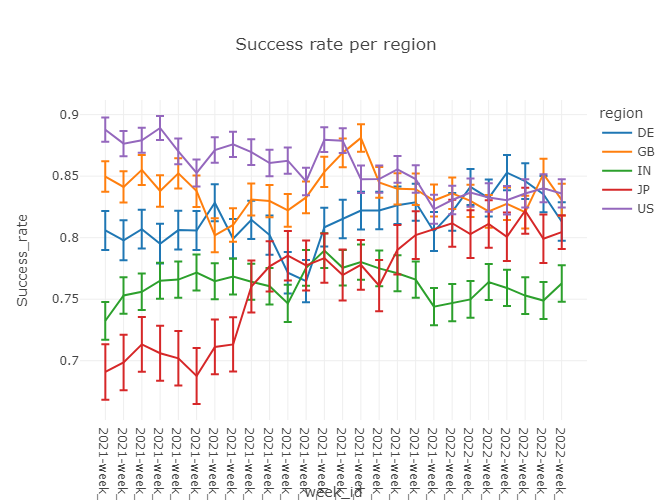

Produce the following requestser proportion graph:

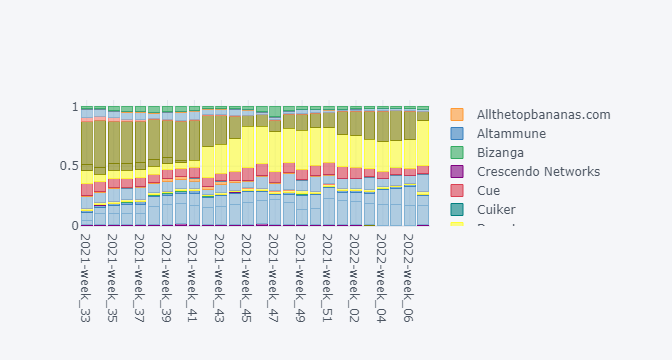

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)